<a href="https://colab.research.google.com/github/dileep999999/ML/blob/main/8_KMeans_%26_Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Clustering

## K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = ss.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(data_scaled)

KMeans(n_clusters=2)

In [6]:
km.inertia_

2599.387384912305

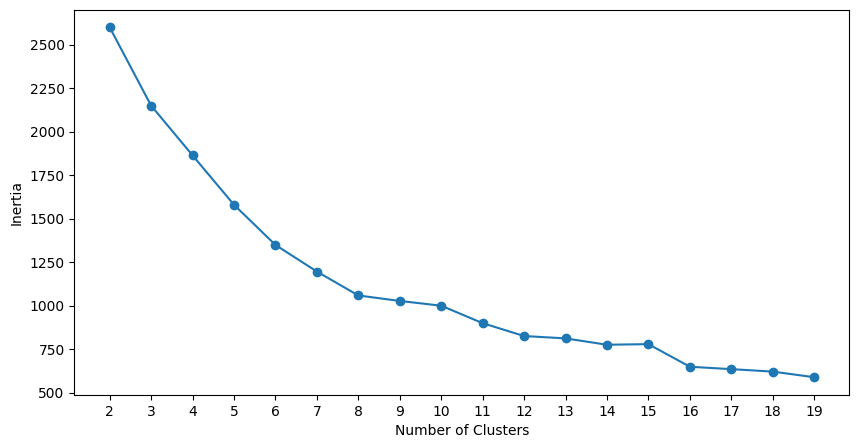

In [7]:
# Elbow Plot
sse = []
for cluster in range(2,20):
    km = KMeans(n_clusters=cluster)
    km.fit(data_scaled)
    sse.append(km.inertia_)

out = pd.DataFrame({'Cluster':range(2,20), 'SSE': sse})
plt.figure(figsize=(10,5))
plt.plot(out['Cluster'], out['SSE'], marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range(2,20))
plt.ylabel("Inertia")
plt.show()

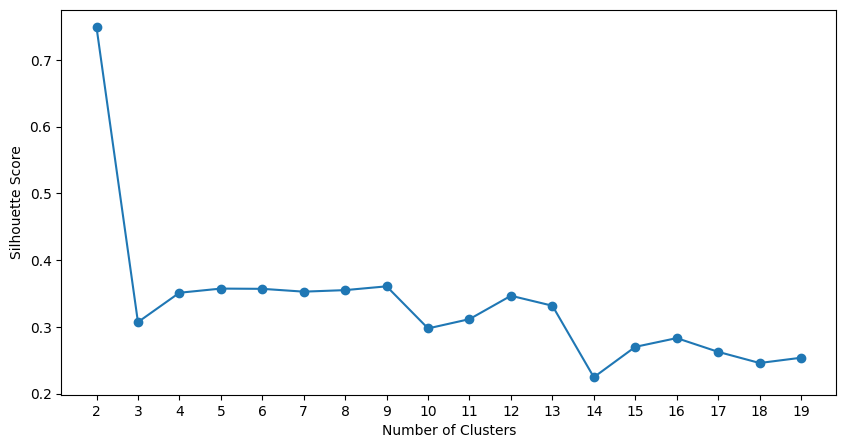

In [8]:
# Silhoutte Score
# Elbow Plot
from sklearn.metrics import silhouette_score
score = []
for cluster in range(2,20):
    km = KMeans(n_clusters=cluster)
    km.fit(data_scaled)
    score.append(silhouette_score(data_scaled,km.labels_))

out = pd.DataFrame({'Cluster':range(2,20), 'Score': score})
plt.figure(figsize=(10,5))
plt.plot(out['Cluster'], out['Score'], marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range(2,20))
plt.ylabel("Silhouette Score")
plt.show()

In [9]:
km = KMeans(n_clusters=7)
km.fit(data_scaled)
data['cluster'] = km.labels_
data['cluster'].value_counts()

,count
cluster,
3,167
1,95
4,86
2,46
0,36
6,5
5,5


In [10]:
data.shape

(440, 9)

## Hierarchial Clustering

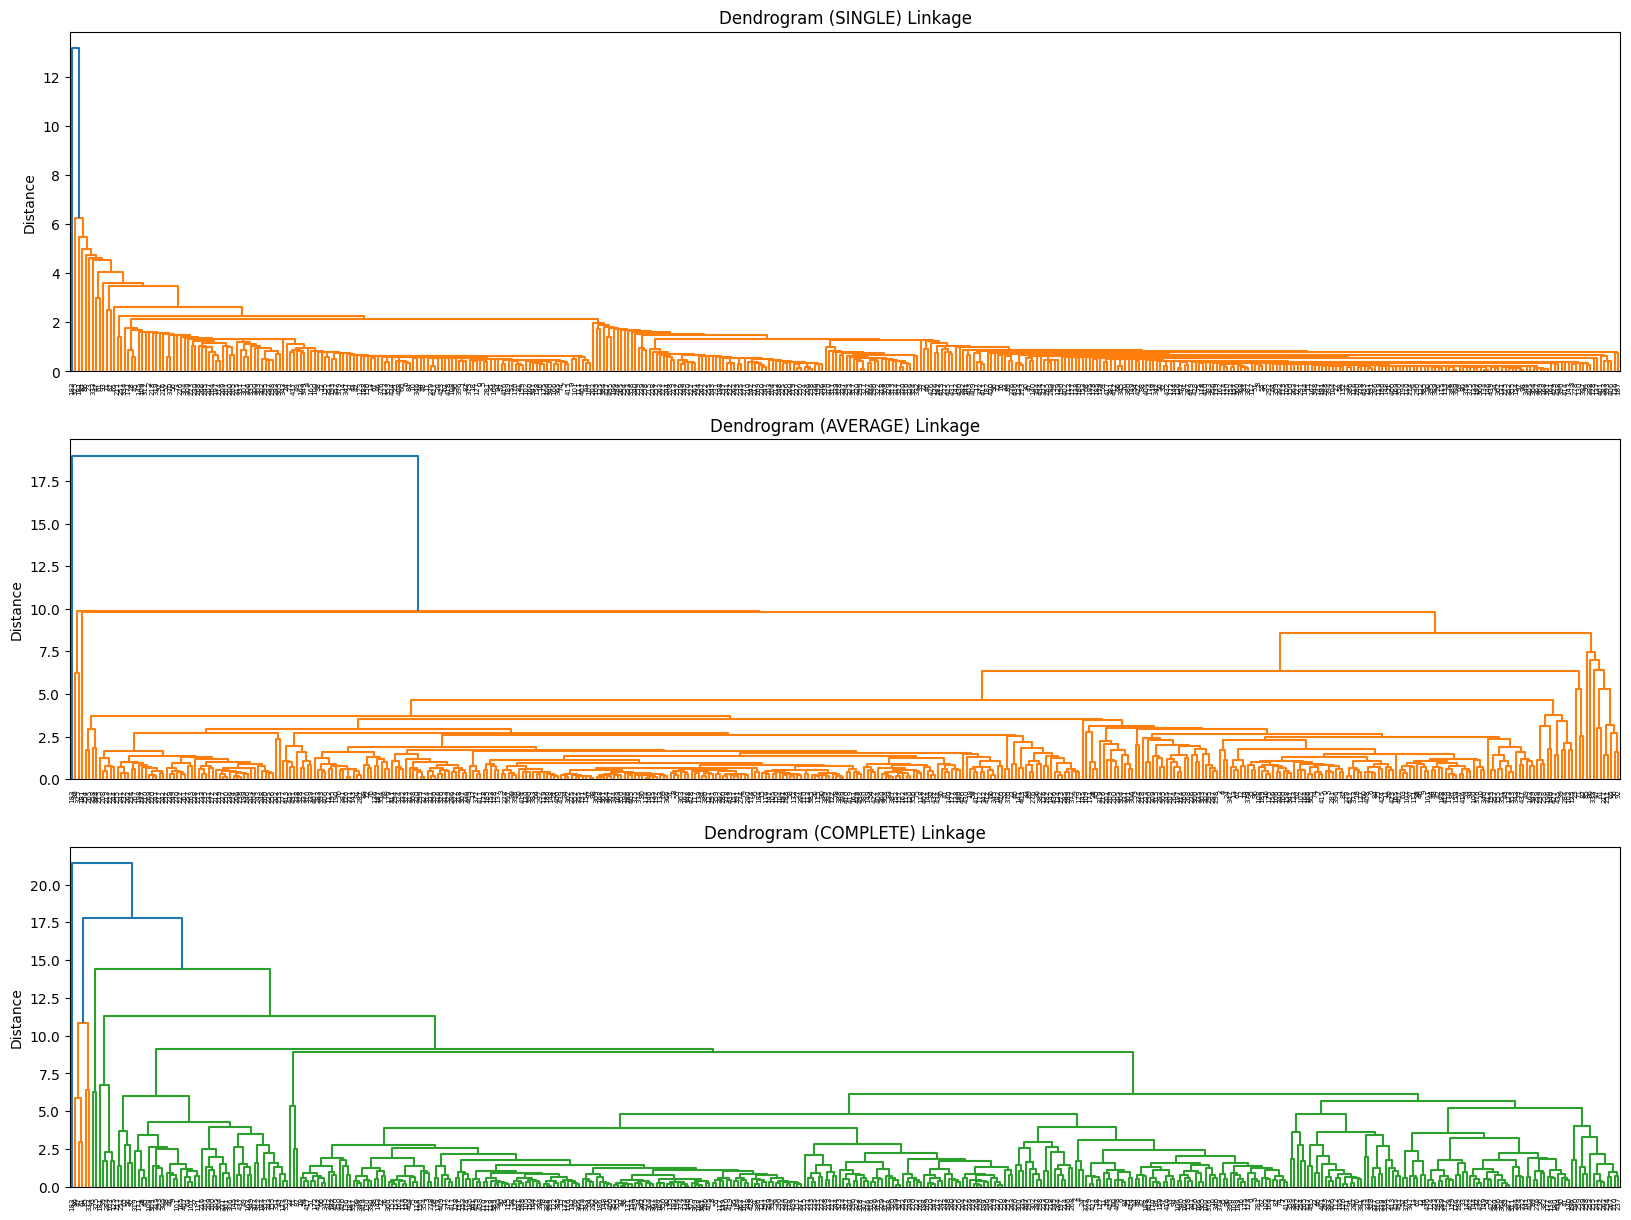

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage

methods = ['single','average','complete']

fig,axes = plt.subplots(len(methods), 1, figsize=(20,15))

for i,method in enumerate(methods):
    z = linkage(data_scaled, metric='euclidean', method=method)
    dendrogram(z,ax=axes[i]);
    axes[i].set_title(f"Dendrogram ({method.upper()}) Linkage")
    axes[i].set_ylabel('Distance')

In [13]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=4,
                                     linkage='complete')
hierarchial.fit(data_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [14]:
data['hierarcy'] = hierarchial.labels_
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,hierarcy
0,2,3,12669,9656,7561,214,2674,1338,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,0
3,1,3,13265,1196,4221,6404,507,1788,3,0
4,2,3,22615,5410,7198,3915,1777,5185,1,0


In [15]:
data['hierarcy'].value_counts()

,count
hierarcy,
0,432
2,5
1,2
3,1


In [16]:
# DBScan
# Density Based Spatial Clustering of Applications with Noise

![image.png](attachment:image.png)

In [17]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1)
data['DBScan'] = dbs.fit_predict(data_scaled)
data['DBScan'].value_counts()

,count
DBScan,
1,187
0,83
-1,81
2,50
4,26
5,7
3,6
